In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


file_path = r"C:\Users\USAMA\Downloads\SampleSuperstore_Cleaned.csv"
data = pd.read_csv(file_path)


print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Postal Code   9977 non-null   int64  
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 935.5+ KB
None
        Ship Mode    Segment             City       State  Postal Code Region  \
0    Second Class   Consumer        Henderson    Kentucky        42420  South   
1    Second Class   Consumer        Henderson    Kentucky   

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoders = {}

# Apply label encoding to all categorical columns
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("Transformed dataset (categorical to numeric):")
print(data.head())

Transformed dataset (categorical to numeric):
   Ship Mode  Segment  City  State  Postal Code  Region  Category  \
0          2        0   194     15        42420       2         0   
1          2        0   194     15        42420       2         0   
2          2        1   266      3        90036       3         1   
3          3        0   153      8        33311       2         0   
4          3        0   153      8        33311       2         1   

   Sub-Category     Sales  Quantity  Discount    Profit  
0             4  261.9600         2      0.00   41.9136  
1             5  731.9400         3      0.00  219.5820  
2            10   14.6200         2      0.00    6.8714  
3            16  957.5775         5      0.45 -383.0310  
4            14   22.3680         2      0.20    2.5164  


In [5]:
# Generate correlation matrix
correlation_matrix = data.corr()

print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
              Ship Mode   Segment      City     State  Postal Code    Region  \
Ship Mode      1.000000 -0.004652 -0.004018  0.011774    -0.004298 -0.024384   
Segment       -0.004652  1.000000  0.005416 -0.002976    -0.010739 -0.005621   
City          -0.004018  0.005416  1.000000  0.009587     0.092789  0.281052   
State          0.011774 -0.002976  0.009587  1.000000    -0.285965 -0.445149   
Postal Code   -0.004298 -0.010739  0.092789 -0.285965     1.000000  0.474290   
Region        -0.024384 -0.005621  0.281052 -0.445149     0.474290  1.000000   
Category      -0.003825  0.010548  0.013530  0.006595    -0.002262 -0.005277   
Sub-Category  -0.003466  0.011221 -0.006802 -0.002682    -0.004442  0.008522   
Sales         -0.001764  0.010936  0.005939  0.004131    -0.023476  0.004508   
Quantity       0.022629  0.008183 -0.000878 -0.000480     0.013110  0.013606   
Discount      -0.000046 -0.017006 -0.151003  0.162957     0.059225 -0.211995   
Profit        -0.006

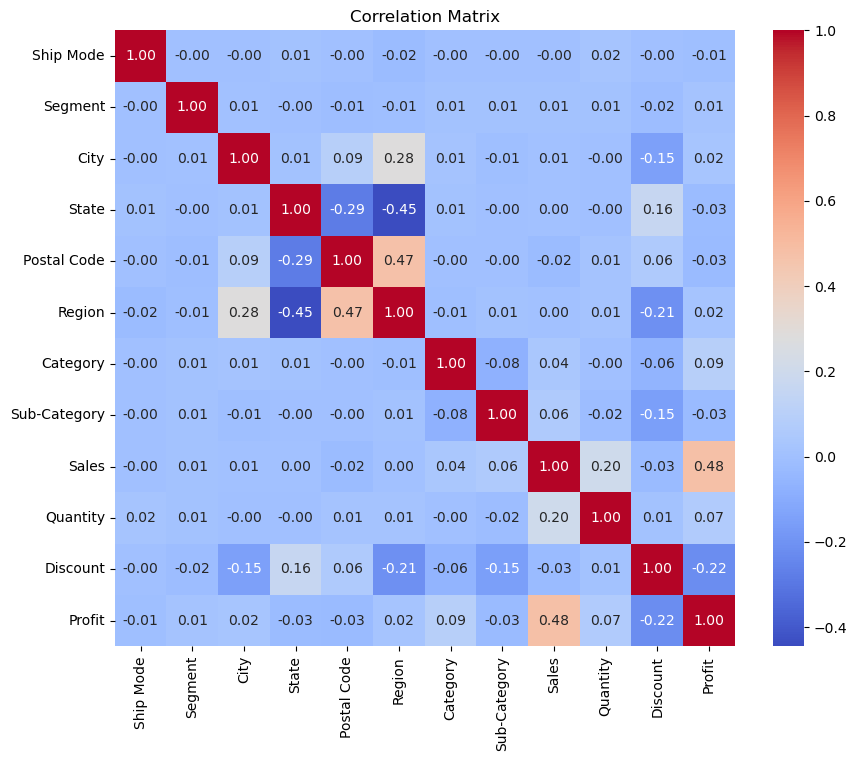

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

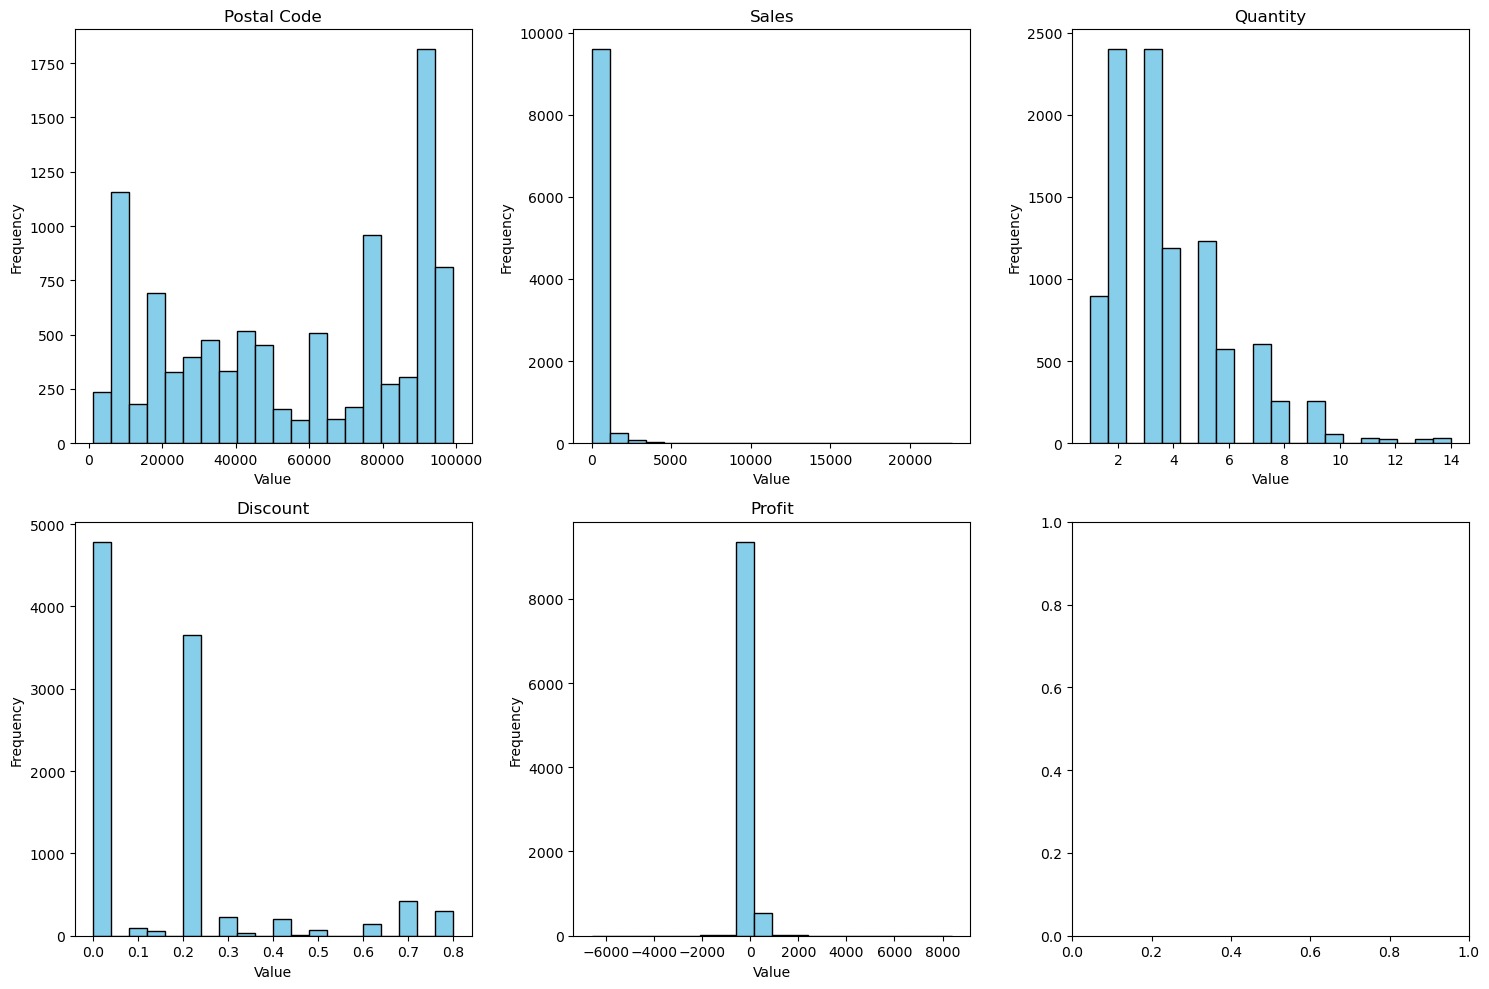

In [31]:
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_columns) // 3 + 1, ncols=3, figsize=(15, 5 * (len(numerical_columns) // 3 + 1)))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot histograms for each numerical feature
for i, column in enumerate(numerical_columns):
    axes[i].hist(data[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


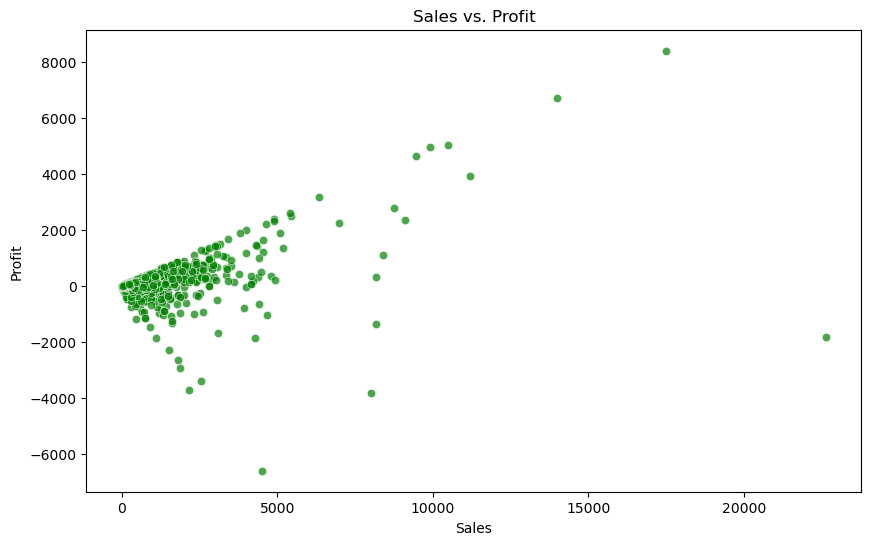

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Sales'], y=data['Profit'], alpha=0.7, color='green')
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


In [17]:

feature_name = ['Sales', 'Discount', 'Quantity', 'Postal Code'] 
target = ['Profit']  
X = data[feature_name]
y = data[target]


test_data = 0.2  
seed = 10  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data, random_state=seed)

In [19]:

regr = LinearRegression() 
regr.fit(X_train, y_train) 


LinearRegression()

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


regr = LinearRegression()

# Perform K-Fold Cross Validation
n_splits = 10  
scores = cross_val_score(regr, X, y, scoring='neg_root_mean_squared_error', cv=n_splits)

# Convert scores to positive values and compute statistics
rmse_scores = -scores
print("K-Fold Cross Validation Results:")
print("Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

K-Fold Cross Validation Results:
Scores: [243.97512787 138.22757758 246.91183215 178.55612067 202.59444937
 136.07468834 215.61126125 266.34292721 197.33415738 197.98998979]
Mean RMSE: 202.36181316146775
Standard Deviation of RMSE: 41.356790675041275


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\USAMA\Downloads\SampleSuperstore_Cleaned.csv"
data = pd.read_csv(file_path)


feature_name = ['Sales', 'Discount', 'Quantity'] 
target = 'Profit' 

X = data[feature_name]  
y = data[target]  


test_data = 0.2  
seed = 10  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data, random_state=seed)

# Train the Linear Regression model
regr = LinearRegression()
regr.fit(X_train, y_train)


y_pred = regr.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)  


accuracy_percentage = r2 * 100

# Print the results
print("Linear Regression Model Performance:")
print("Scores:", y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)
print("Model Accuracy :", accuracy_percentage, "%")

Linear Regression Model Performance:
Scores: [ 16.60251133  31.99621693 139.59075707 ... -14.61896839  -3.8186491
   2.81331876]
Mean Squared Error (MSE): 30300.128986192747
R-squared Score (R²): 0.27353265818325445
Model Accuracy : 27.353265818325447 %


In [116]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=seed)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_percentage_rf = r2_rf * 100

# Print the results
print("Random Forest Regressor Model Performance:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared Score (R²):", r2_rf)
print("Model Accuracy :", accuracy_percentage_rf, "%")

Random Forest Regressor Model Performance:
Mean Squared Error (MSE): 7074.626364238957
R-squared Score (R²): 0.8303807547645319
Model Accuracy : 83.03807547645319 %


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed)
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model's performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)  
r2_gbr = r2_score(y_test, y_pred_gbr)


print("Gradient Boosting Regressor Model Performance:")
print("Mean Squared Error (MSE):", mse_gbr)
print("R-squared Score (R²):", r2_gbr)
print("Model Accuracy :", rmse_gbr)




Gradient Boosting Regressor Model Performance:
Mean Squared Error (MSE): 9591.711101782701
R-squared Score (R²): 0.7700318414234647
Model Accuracy : 97.9372814702486


In [27]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the DecisionTreeRegressor with parameters to avoid overfitting
dt = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=4)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
accuracy_dt = 100 * (1 - (rmse_dt / np.std(y_test)))  

# Print results
print("Decision Tree Regressor Model Performance:")
print("Mean Squared Error (MSE):", rmse_dt**2)  
print("R-squared Score (R²):", r2_dt)
print("Model Accuracy:", accuracy_dt)


Decision Tree Regressor Model Performance:
Mean Squared Error (MSE): 9338.5135125707
R-squared Score (R²): 0.7761024353695521
Model Accuracy: 52.68218468373163


In [29]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the KNN Regressor with the number of neighbors (k) you want to use
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
accuracy_knn = 100 * (1 - (rmse_knn / np.std(y_test)))  # Accuracy based on RMSE

# Print results
print("K-Nearest Neighbors Regressor Model Performance:")
print("Mean Squared Error (MSE):", rmse_knn ** 2)  # MSE is RMSE^2
print("R-squared Score (R²):", r2_knn)
print("Model Accuracy:", accuracy_knn)


K-Nearest Neighbors Regressor Model Performance:
Mean Squared Error (MSE): 30598.038610991447
R-squared Score (R²): 0.26639006108976504
Model Accuracy: 14.348967378656996
